# House Pricing Prediction Portfolio - Notebook 2 of 3

After completing the cleaning steps on the dataset in the "House Pricing Prediction Data Cleaning Notebook" in the project portfolio.

We will now explore the dataset to get an understanding of the independent variables to the target variable.

We need to generate some hypothesis based on Domain knowledge that will need to be validated during the EDA process.

 - Properties with big LotArea will be more expensive
 - Neighborhoods with low residential density will be more expensive
 - Properties with pool will be more expensive
 - The older a property is the less expensive it will be
 - Properties with bigger Garage Area will be more expensive
 - Road access to house will affect Property SalePrice
 - Recently sold properties will be more expensive
 - Houses with more bedrooms will be more expensive

We will review these hypothesis as we explore the dataset.

In [1]:
#Analysis packages
import pandas as pd
import sklearn as sk
import numpy as np
import scipy.stats as sp

#Visualization packages
import matplotlib.pyplot as plt
import matplotlib as matplot
from matplotlib.ticker import MaxNLocator
import seaborn as sns


%matplotlib inline

#Preprocessing
from sklearn import preprocessing

#setting directory where python interpreter looks for code files
import sys
sys.path.insert(0, './scripts')

#read in functions from script file
from codes import data_clean, eda_process, model

from tqdm import tqdm
import datetime

import warnings
warnings.filterwarnings('ignore')
#your info here
__author__ = "Laniya Oladapo"
__email__ = "laniyadapo@gmail.com"

### 1.2 Define Classes

Using OOP - Objective Oriented Programming to create classes for functions used in the project.

Classes are defined in "codes.py" module under script folder in working directory

## Part 2 - Data Discovery (continued)

2.4.1 Load and Prepare Data

In [2]:
#load the data exported from the Data Cleaning Notebook into a Pandas dataframe
train_df = pd.read_csv("train_df_forEDA.csv")
test_df = pd.read_csv("test_df_forEDA.csv")

2.4.2 Checking for relationship between features and SalePrice

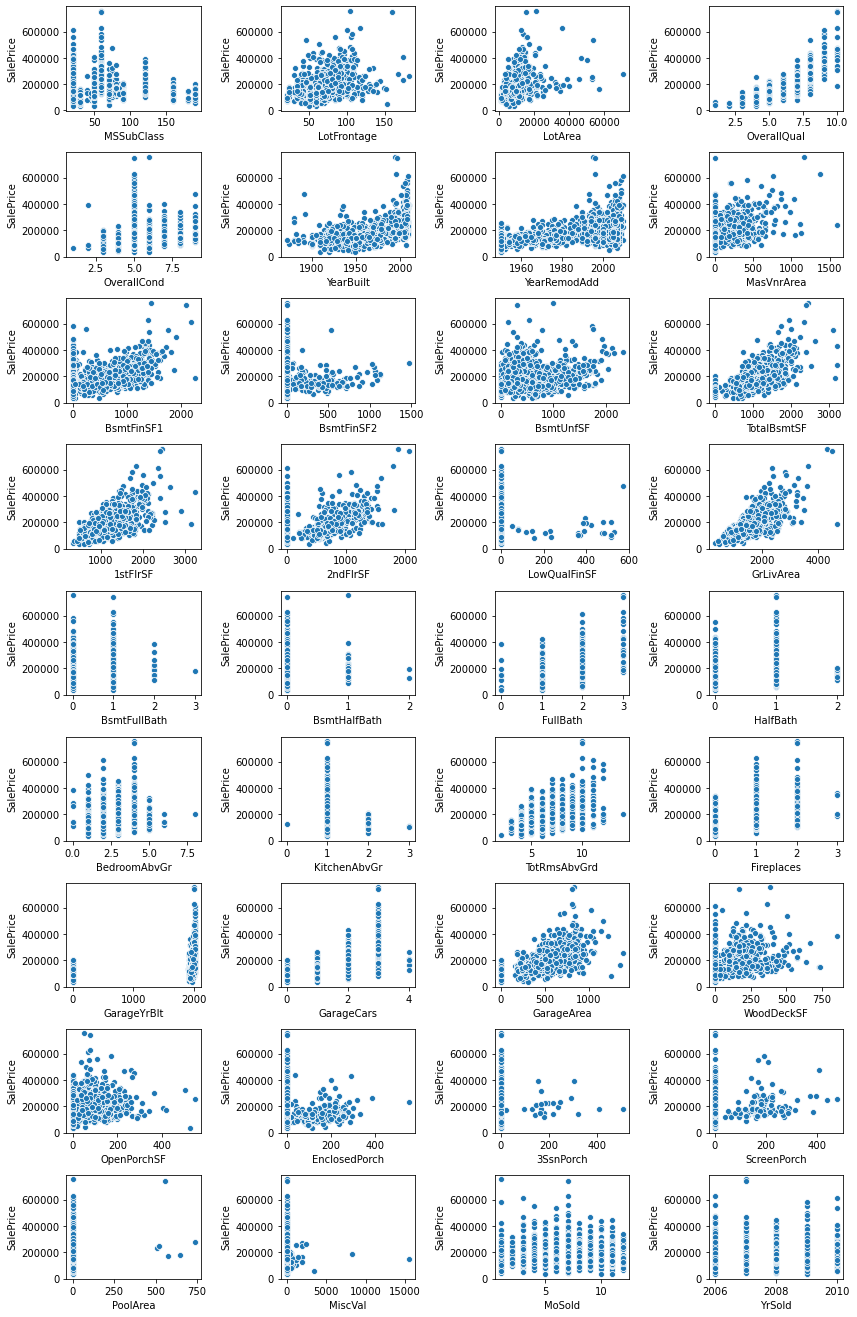

In [3]:
#Numeric features inspection for relationship with target variable
num_bivariate_plot = data_clean(train_df)
num_bivariate_plot.num_features_outliers()

In [4]:
train_df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

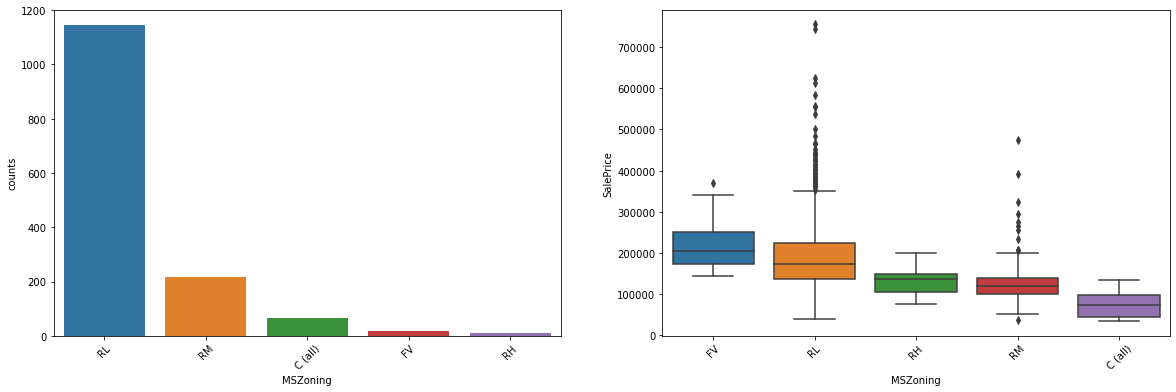

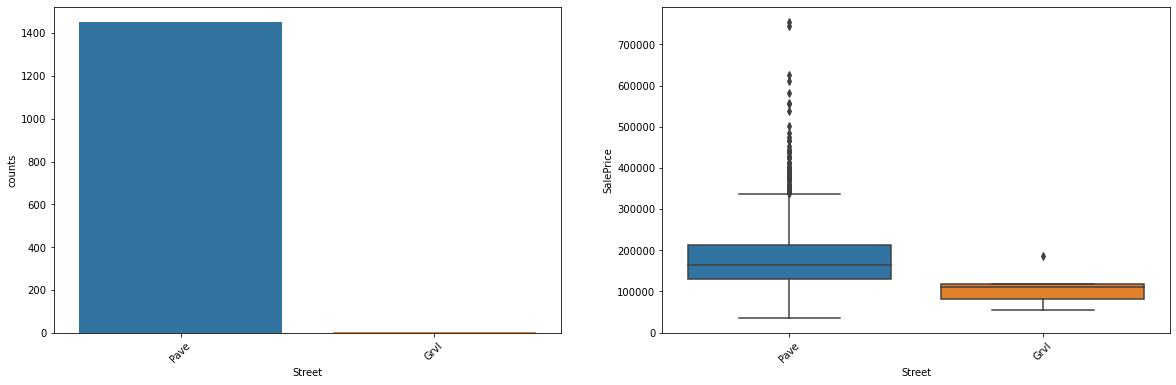

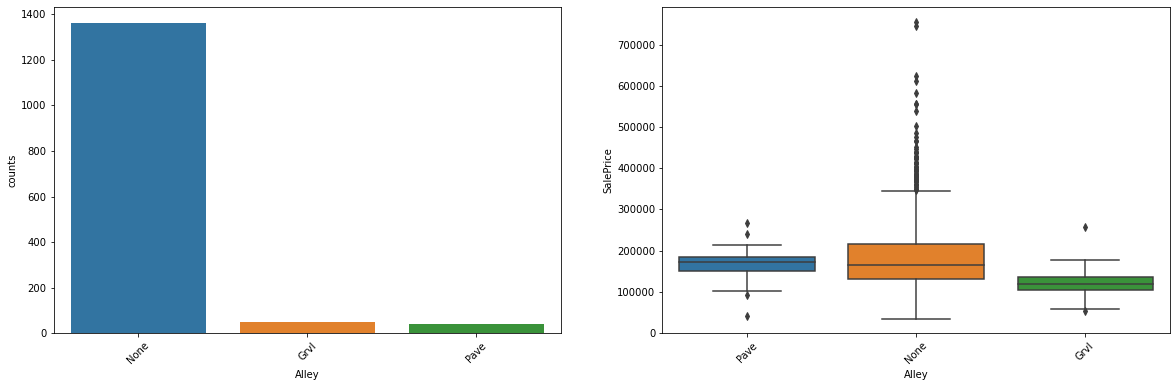

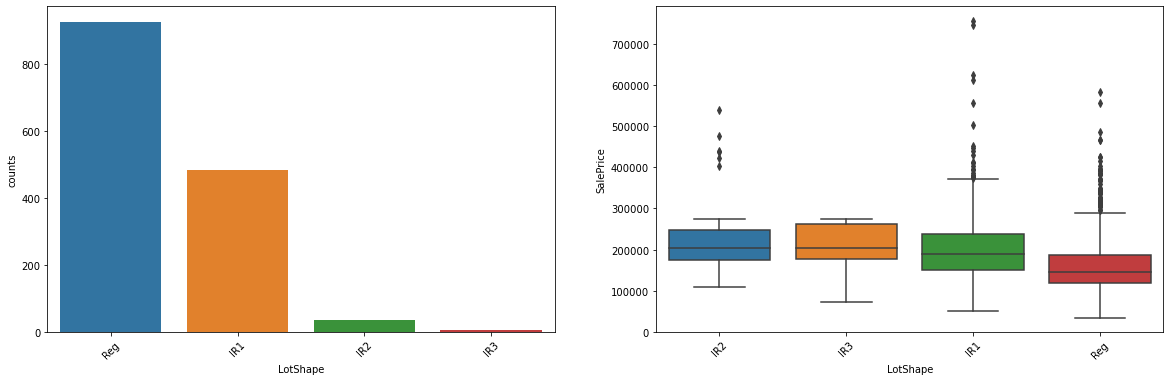

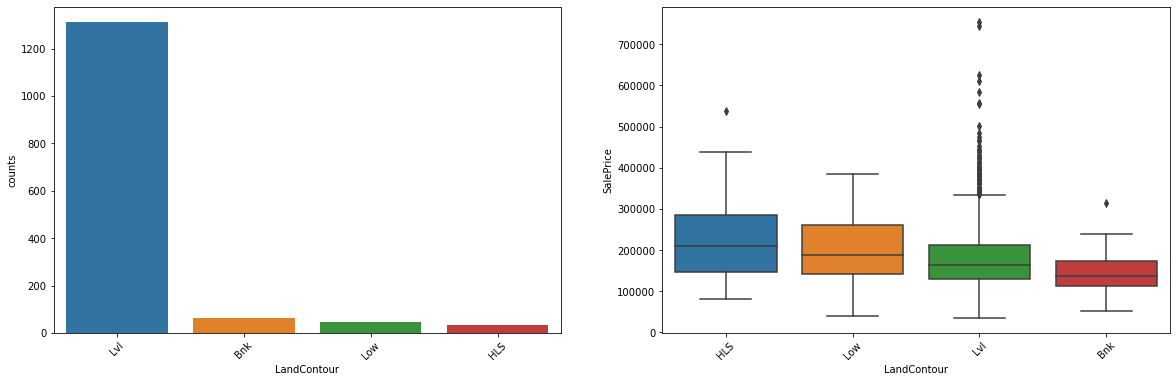

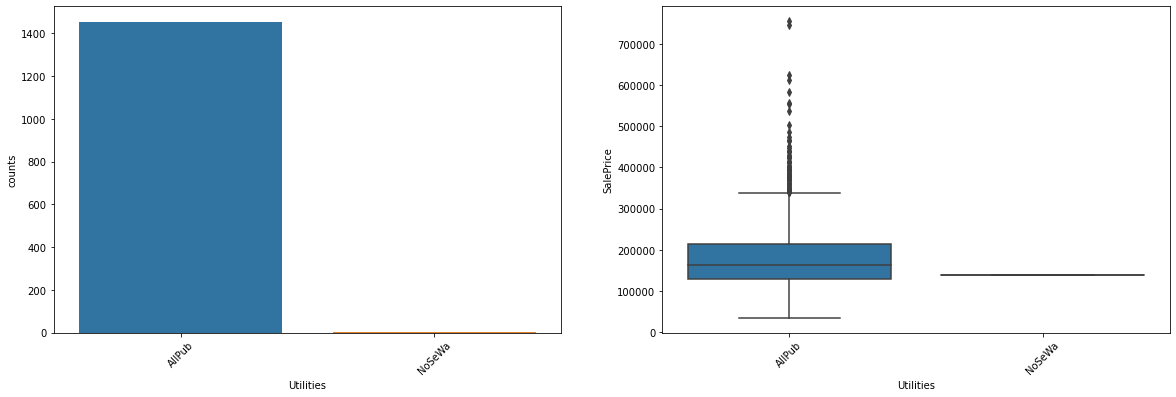

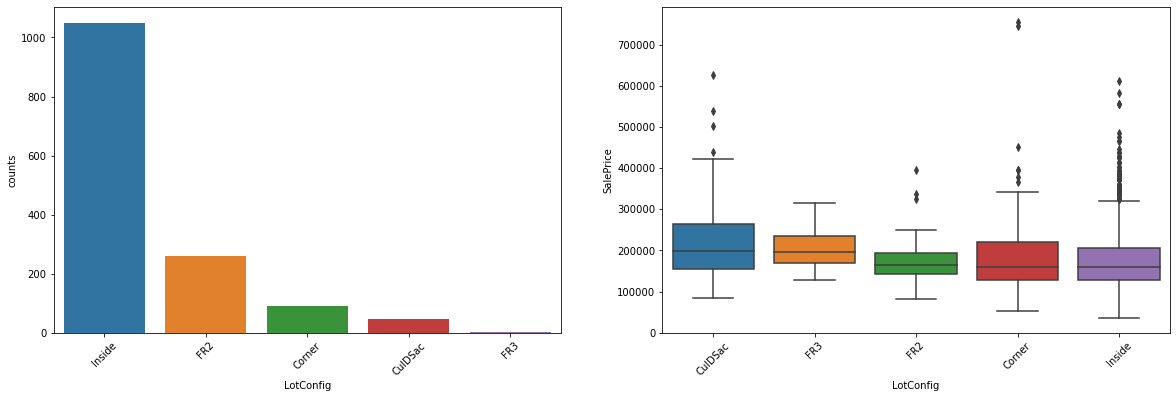

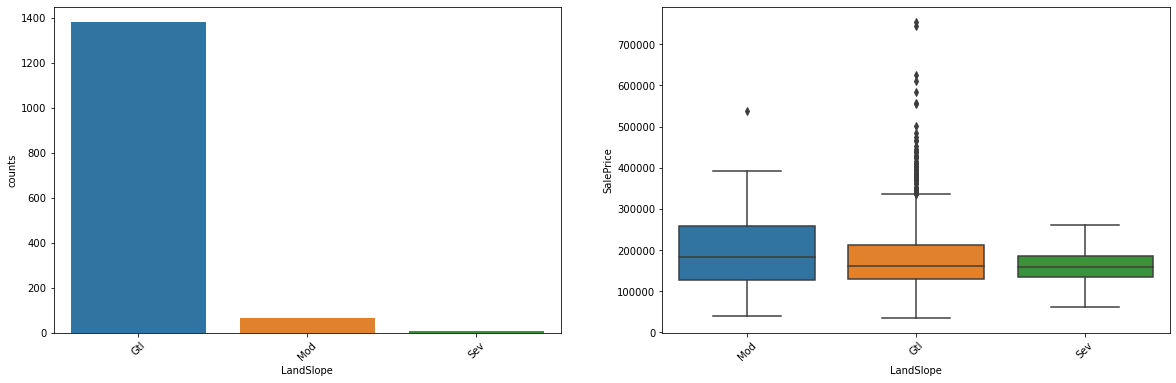

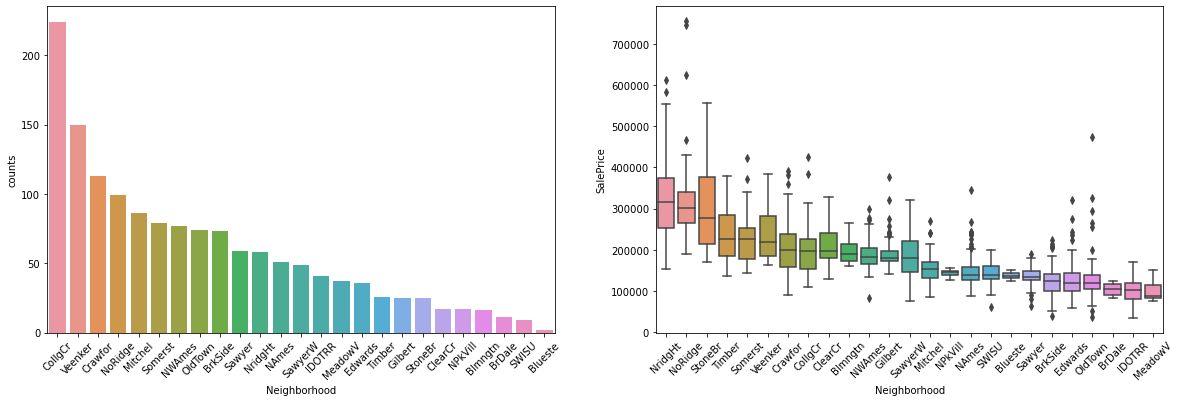

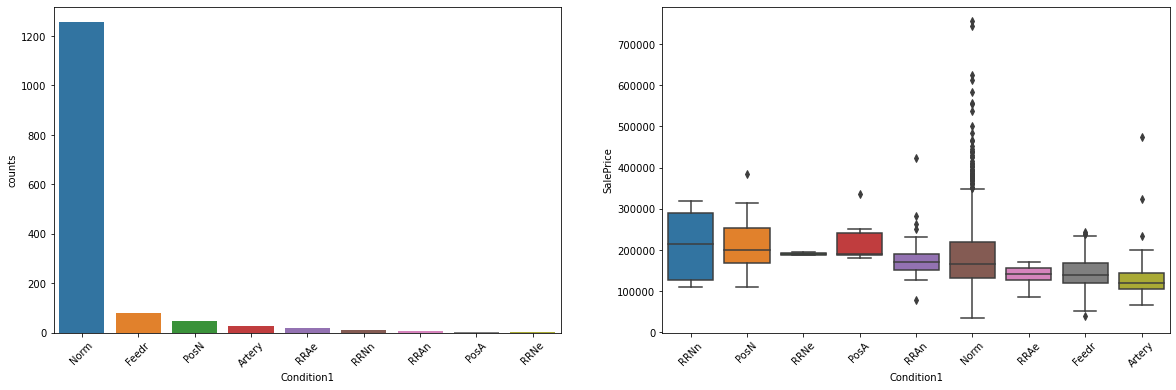

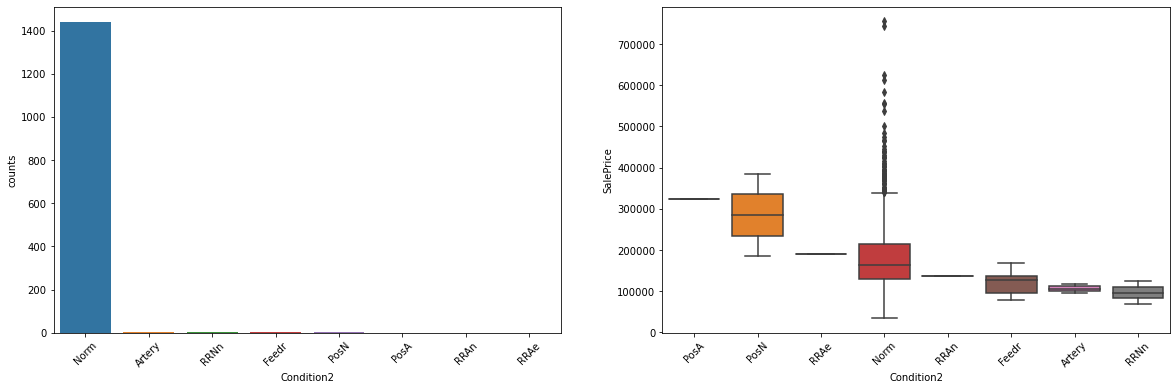

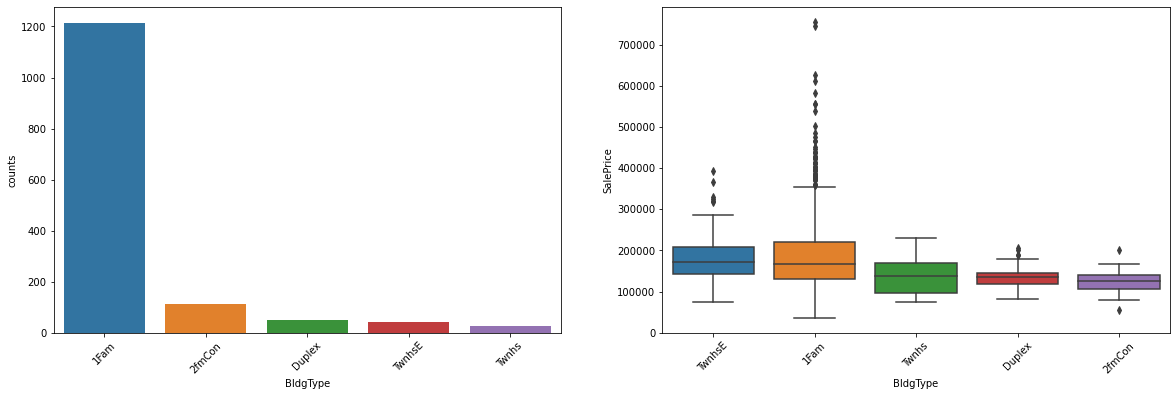

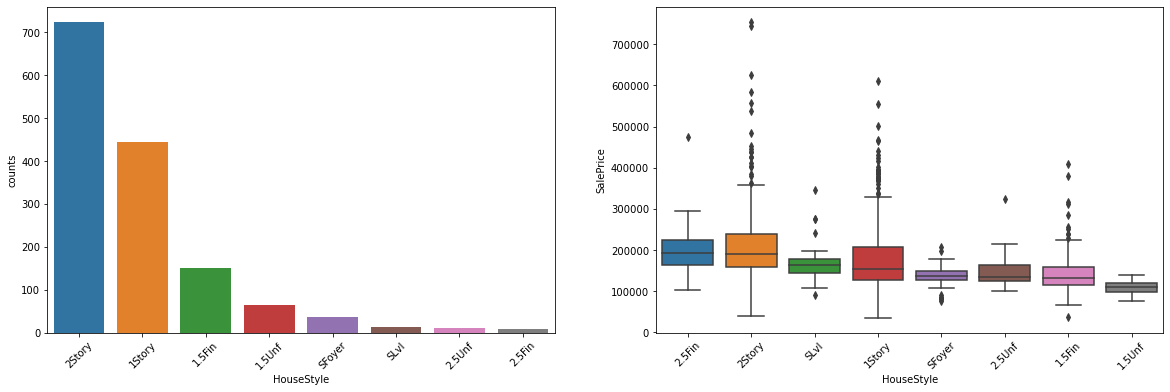

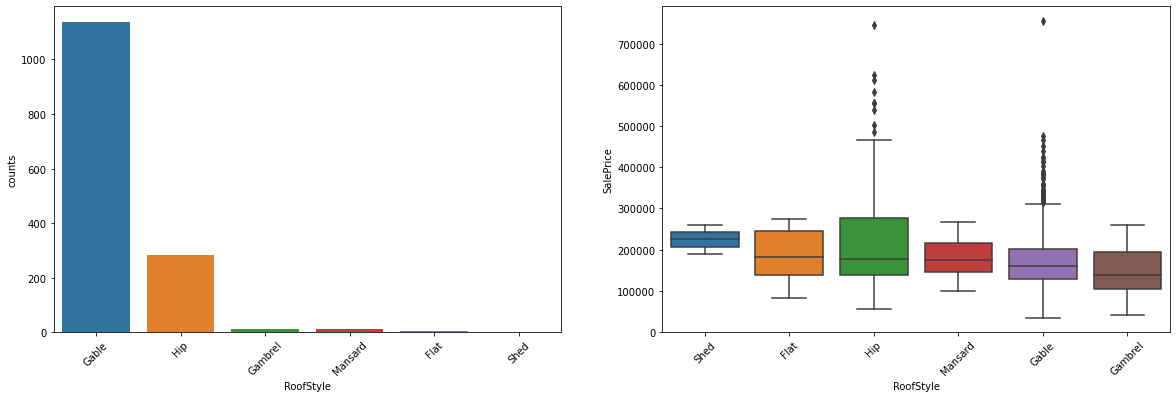

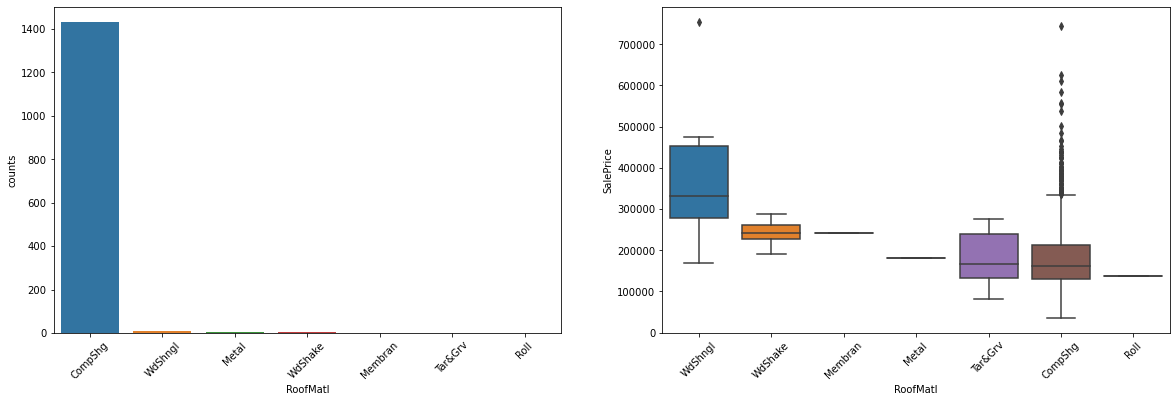

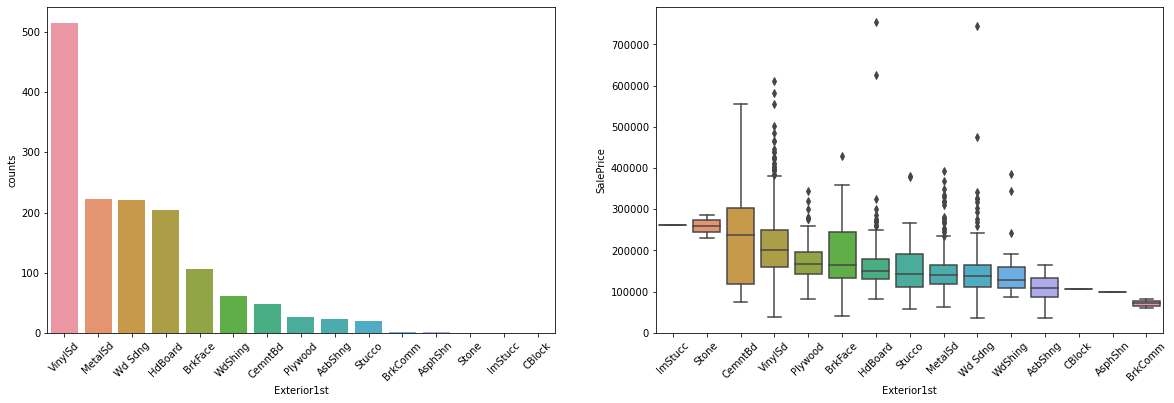

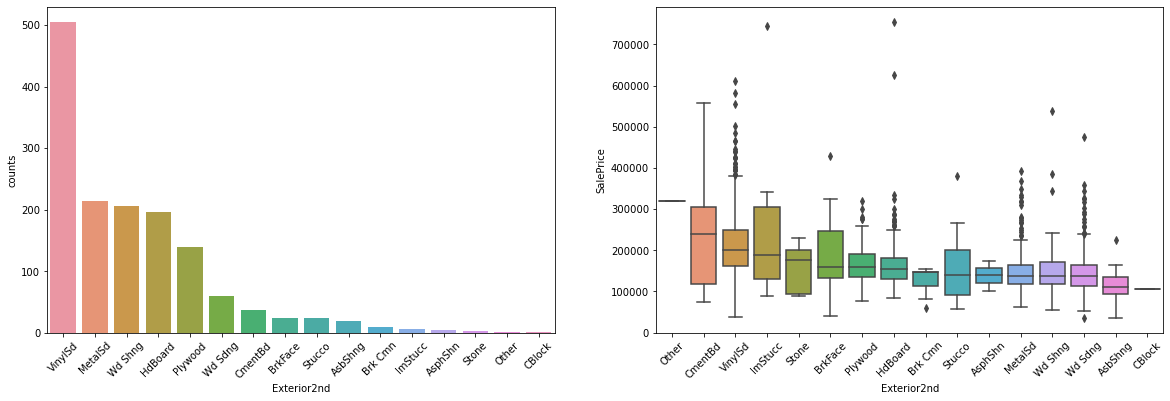

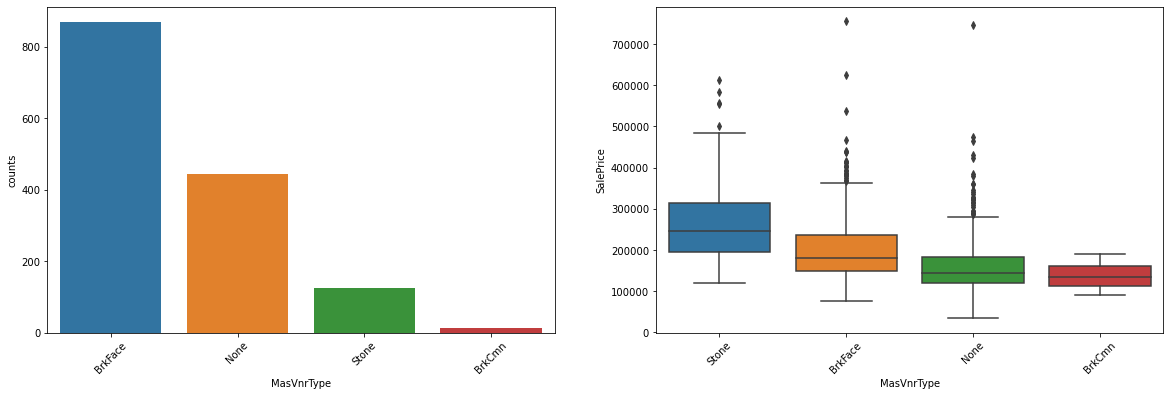

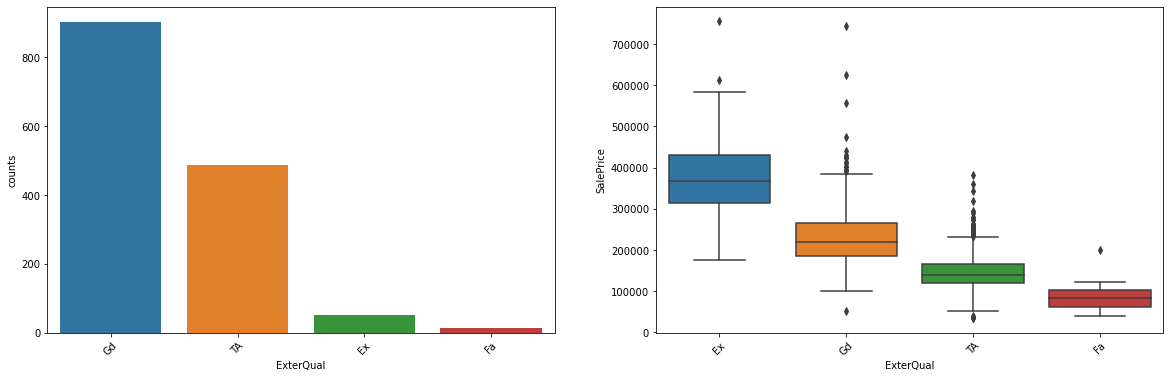

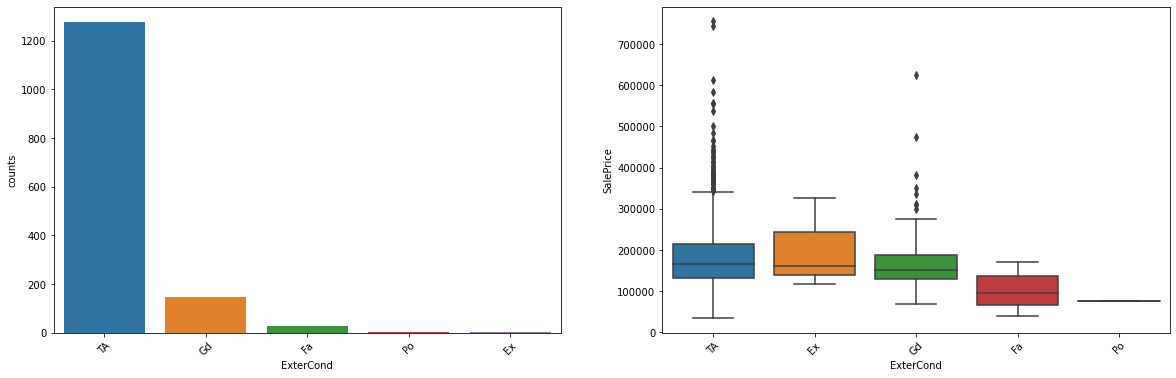

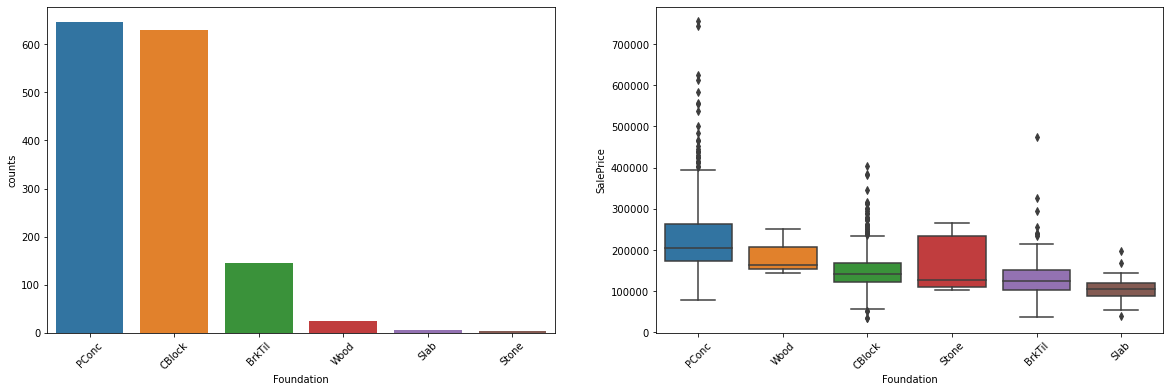

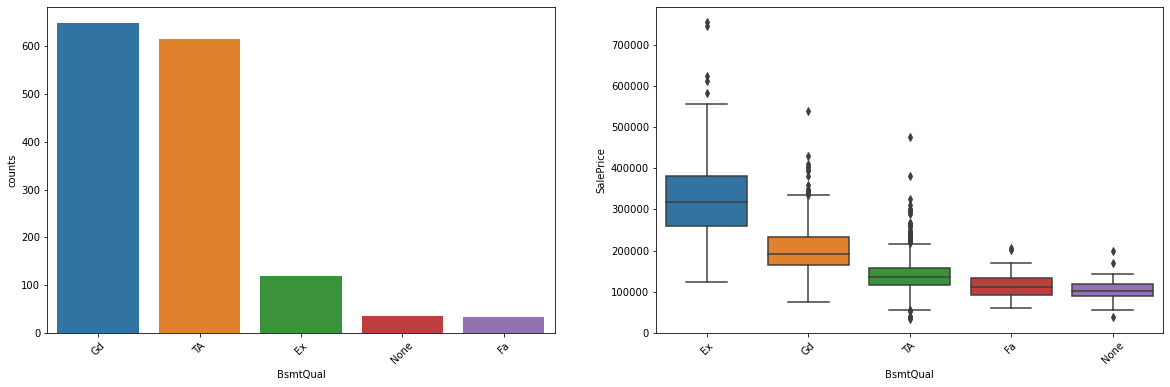

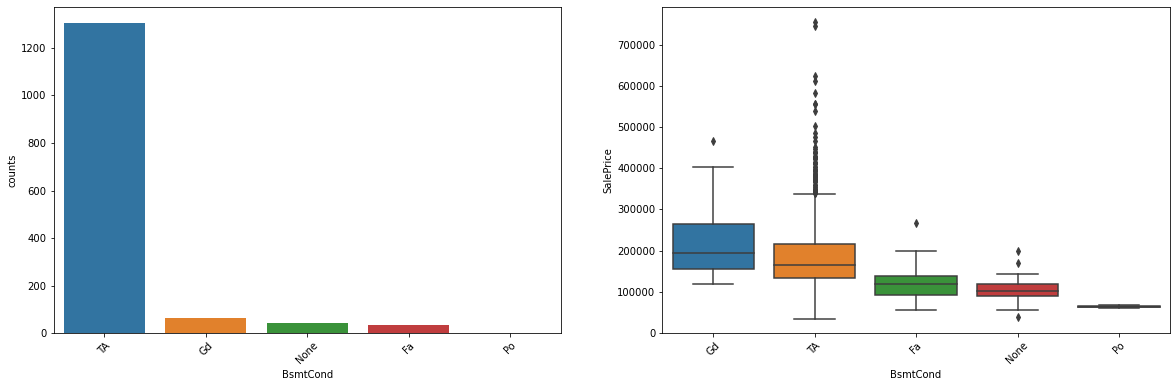

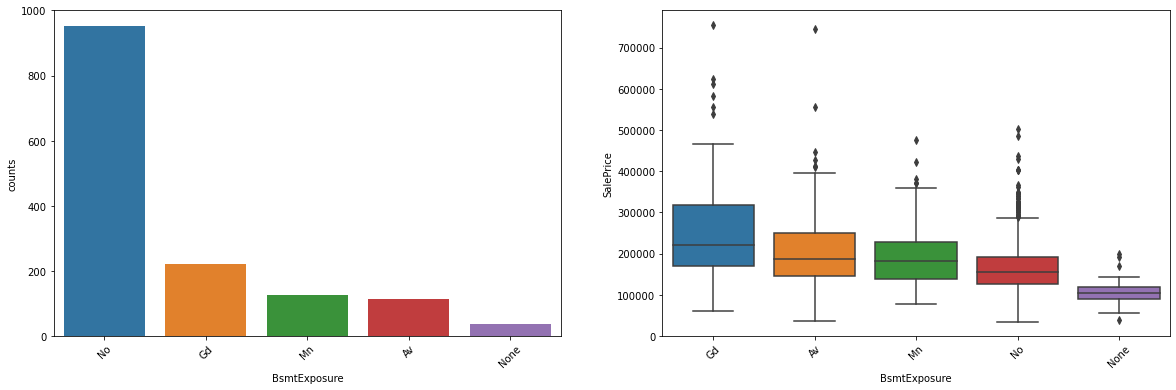

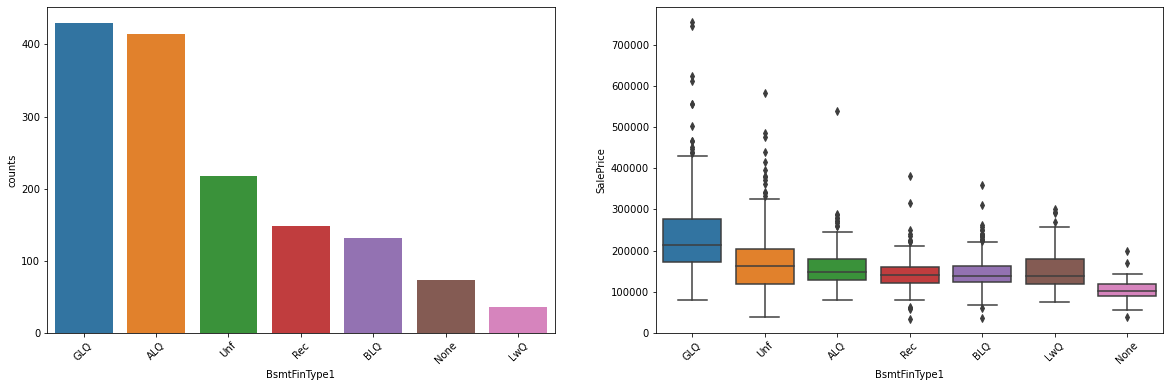

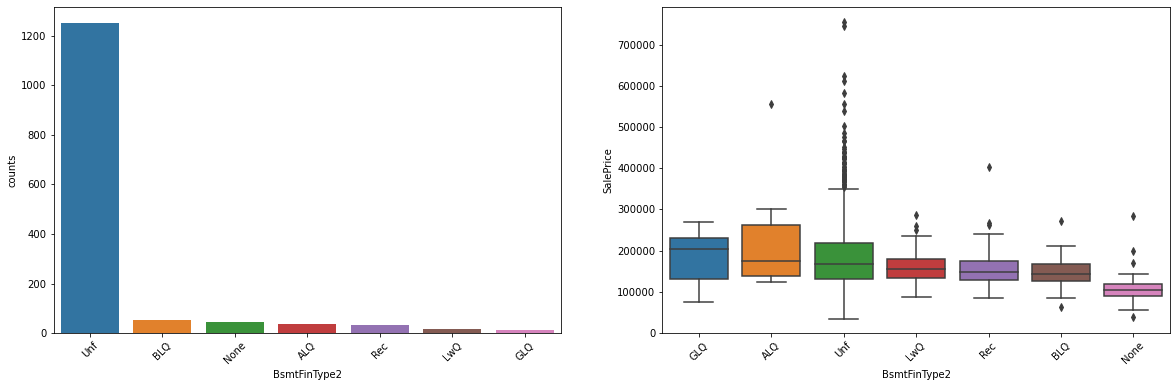

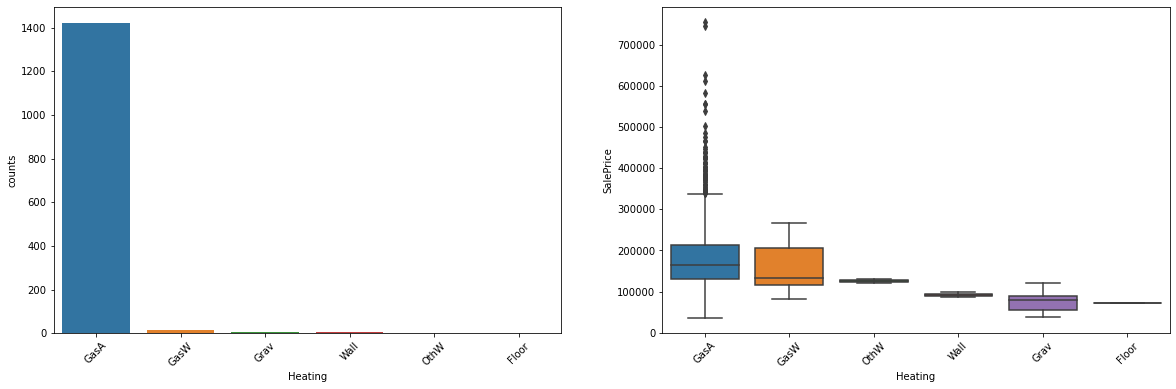

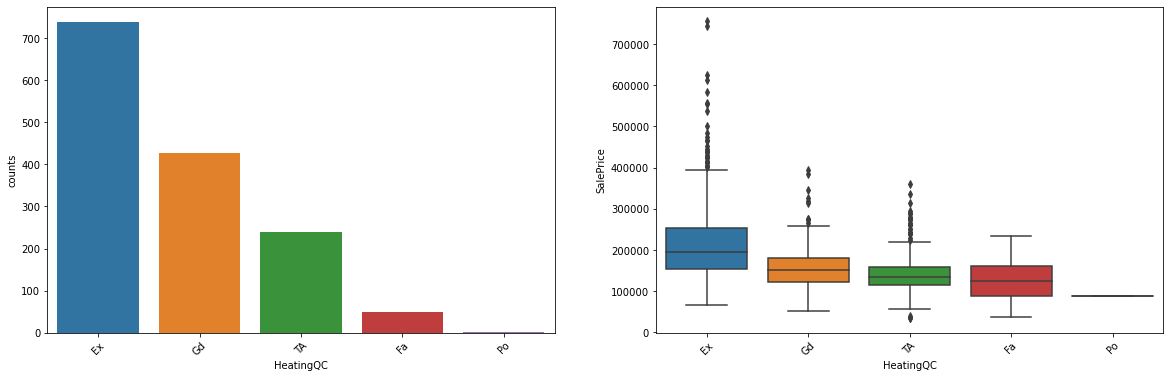

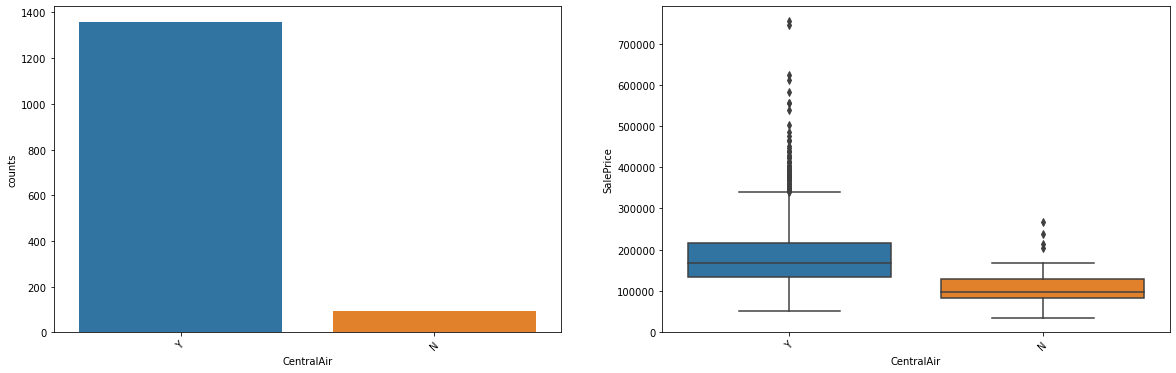

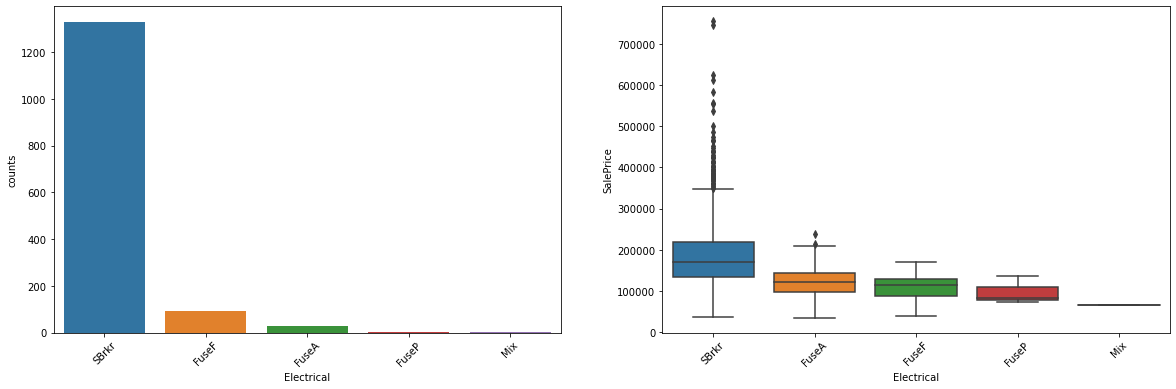

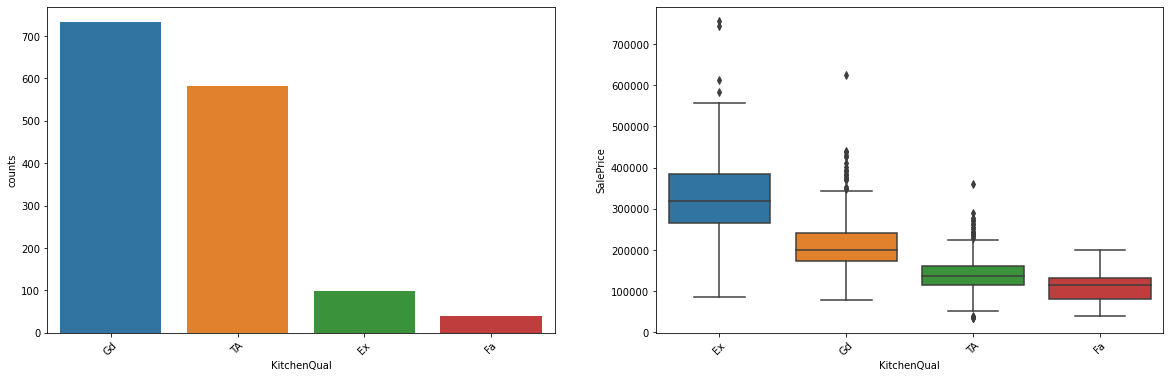

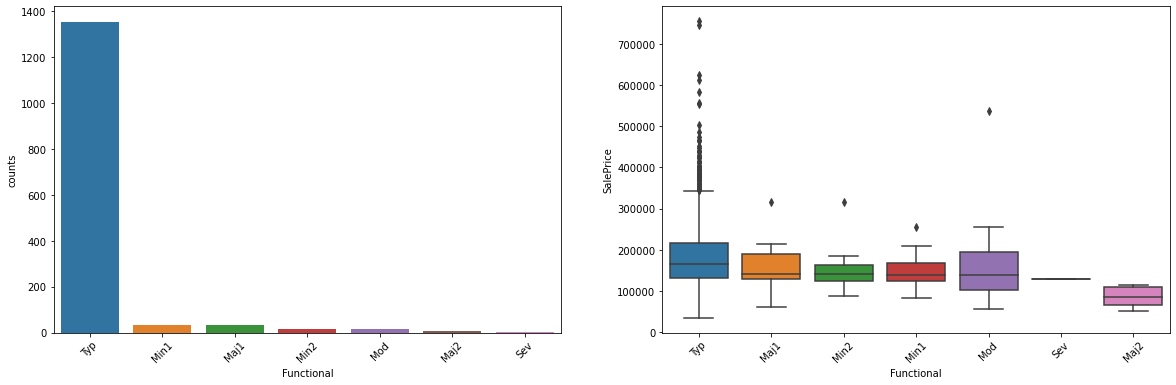

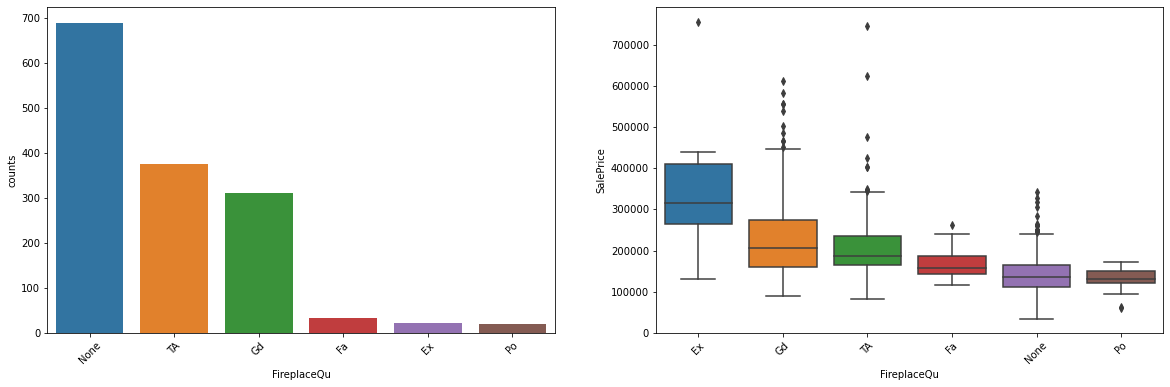

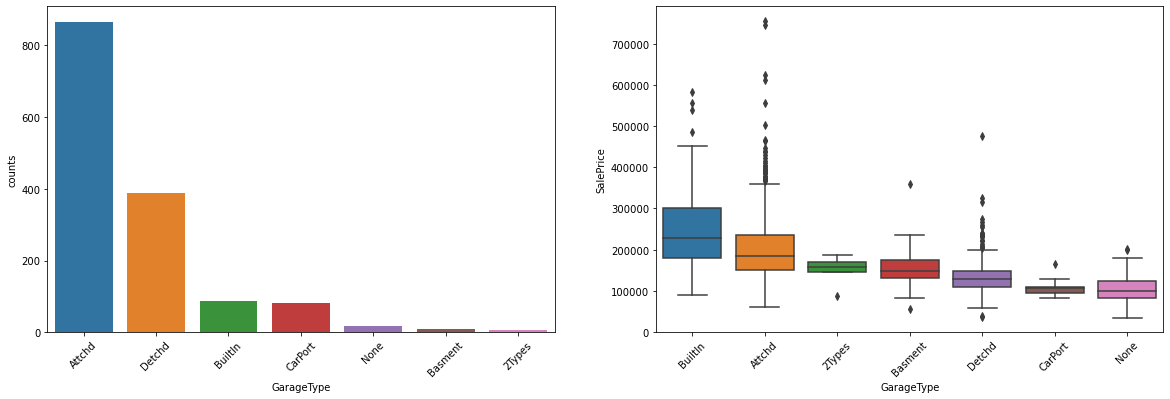

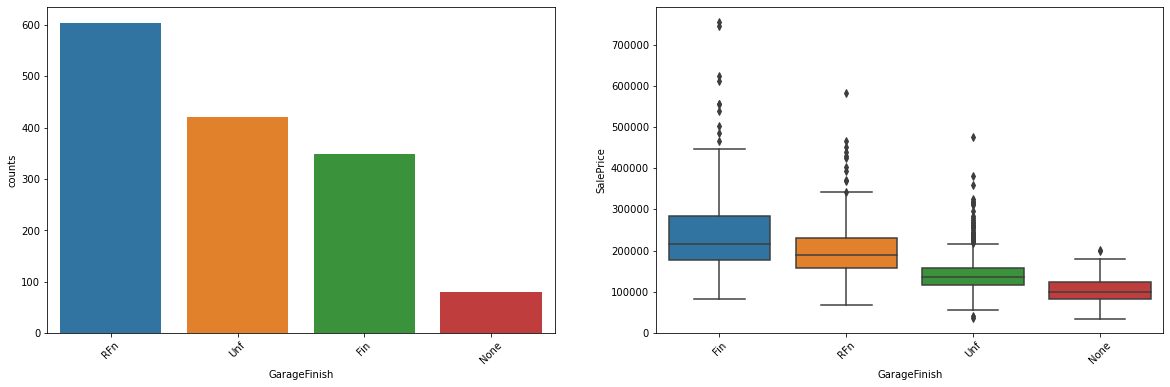

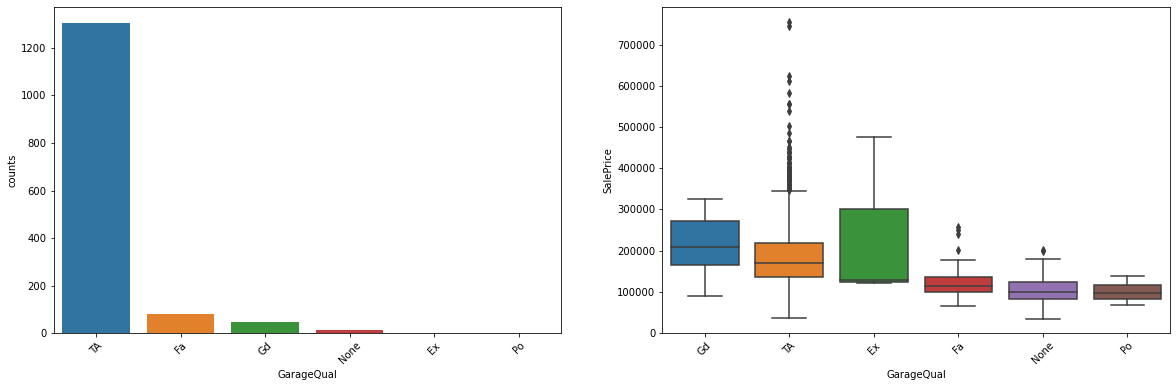

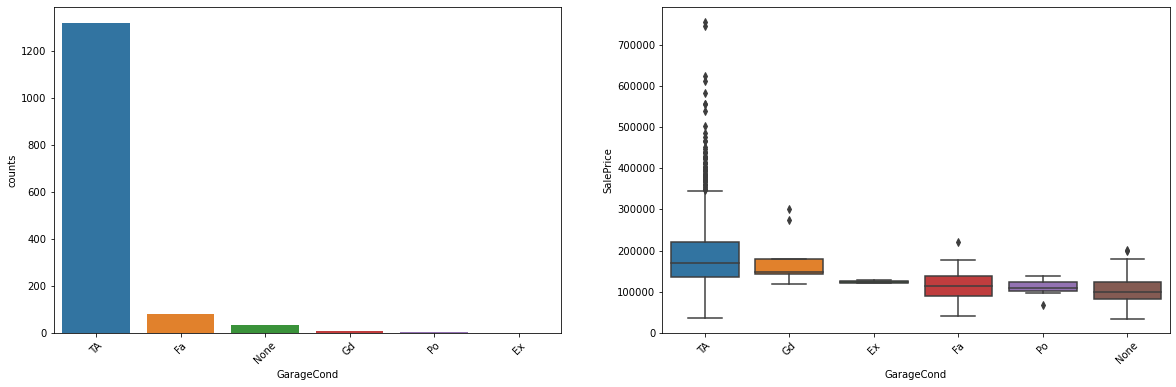

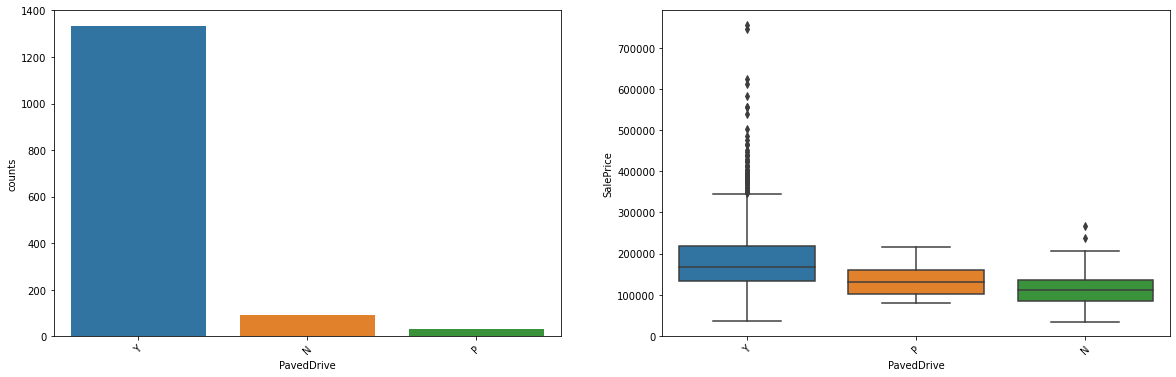

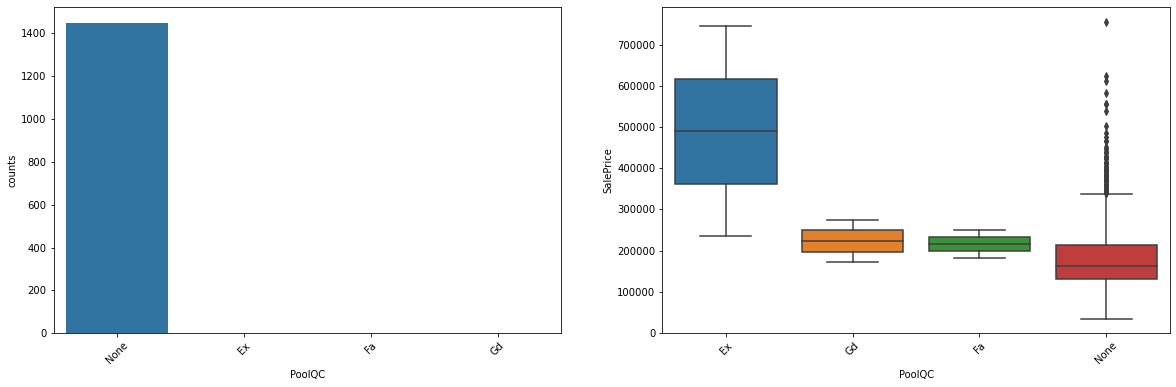

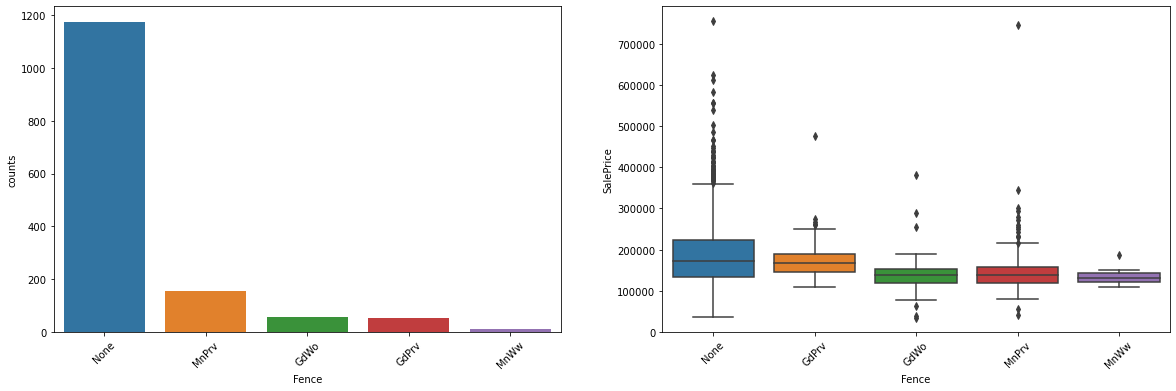

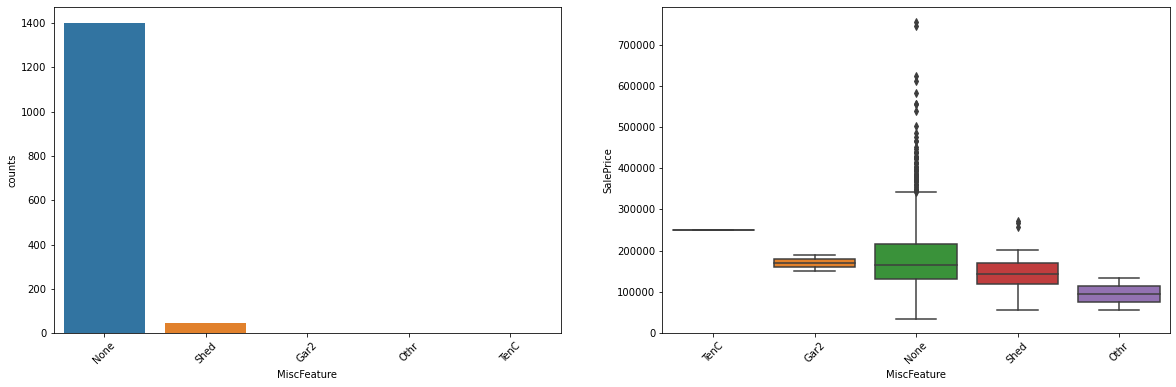

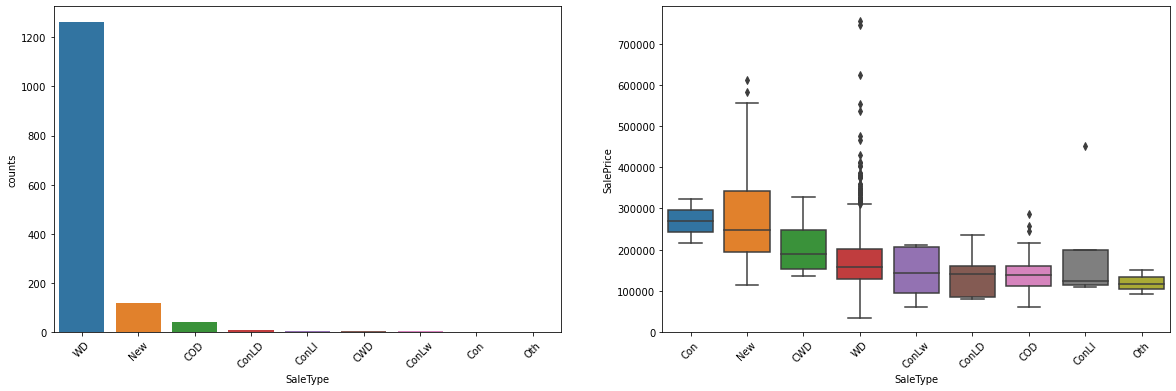

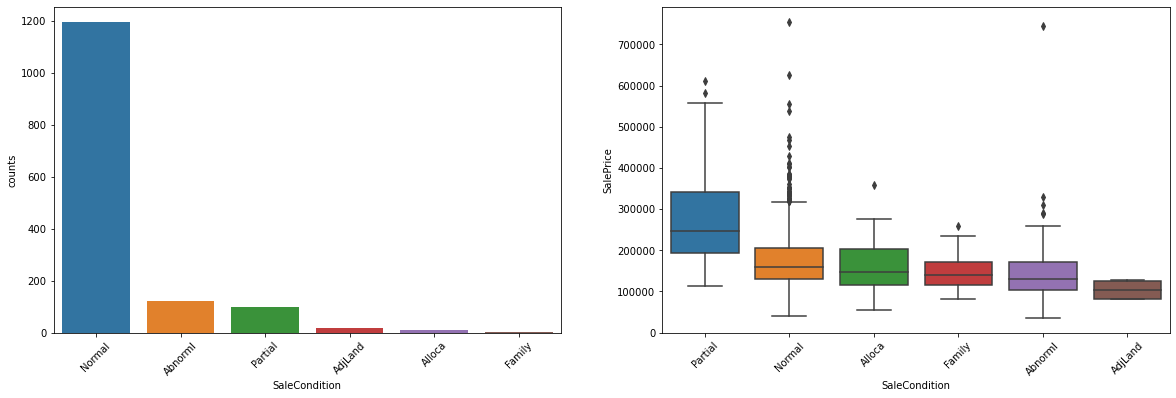

In [5]:
#Plot to inspect relationship between categorical features and SalePrice
features= ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

cat_plot = eda_process(train_df)
cat_plot.cat_features_plot(features)

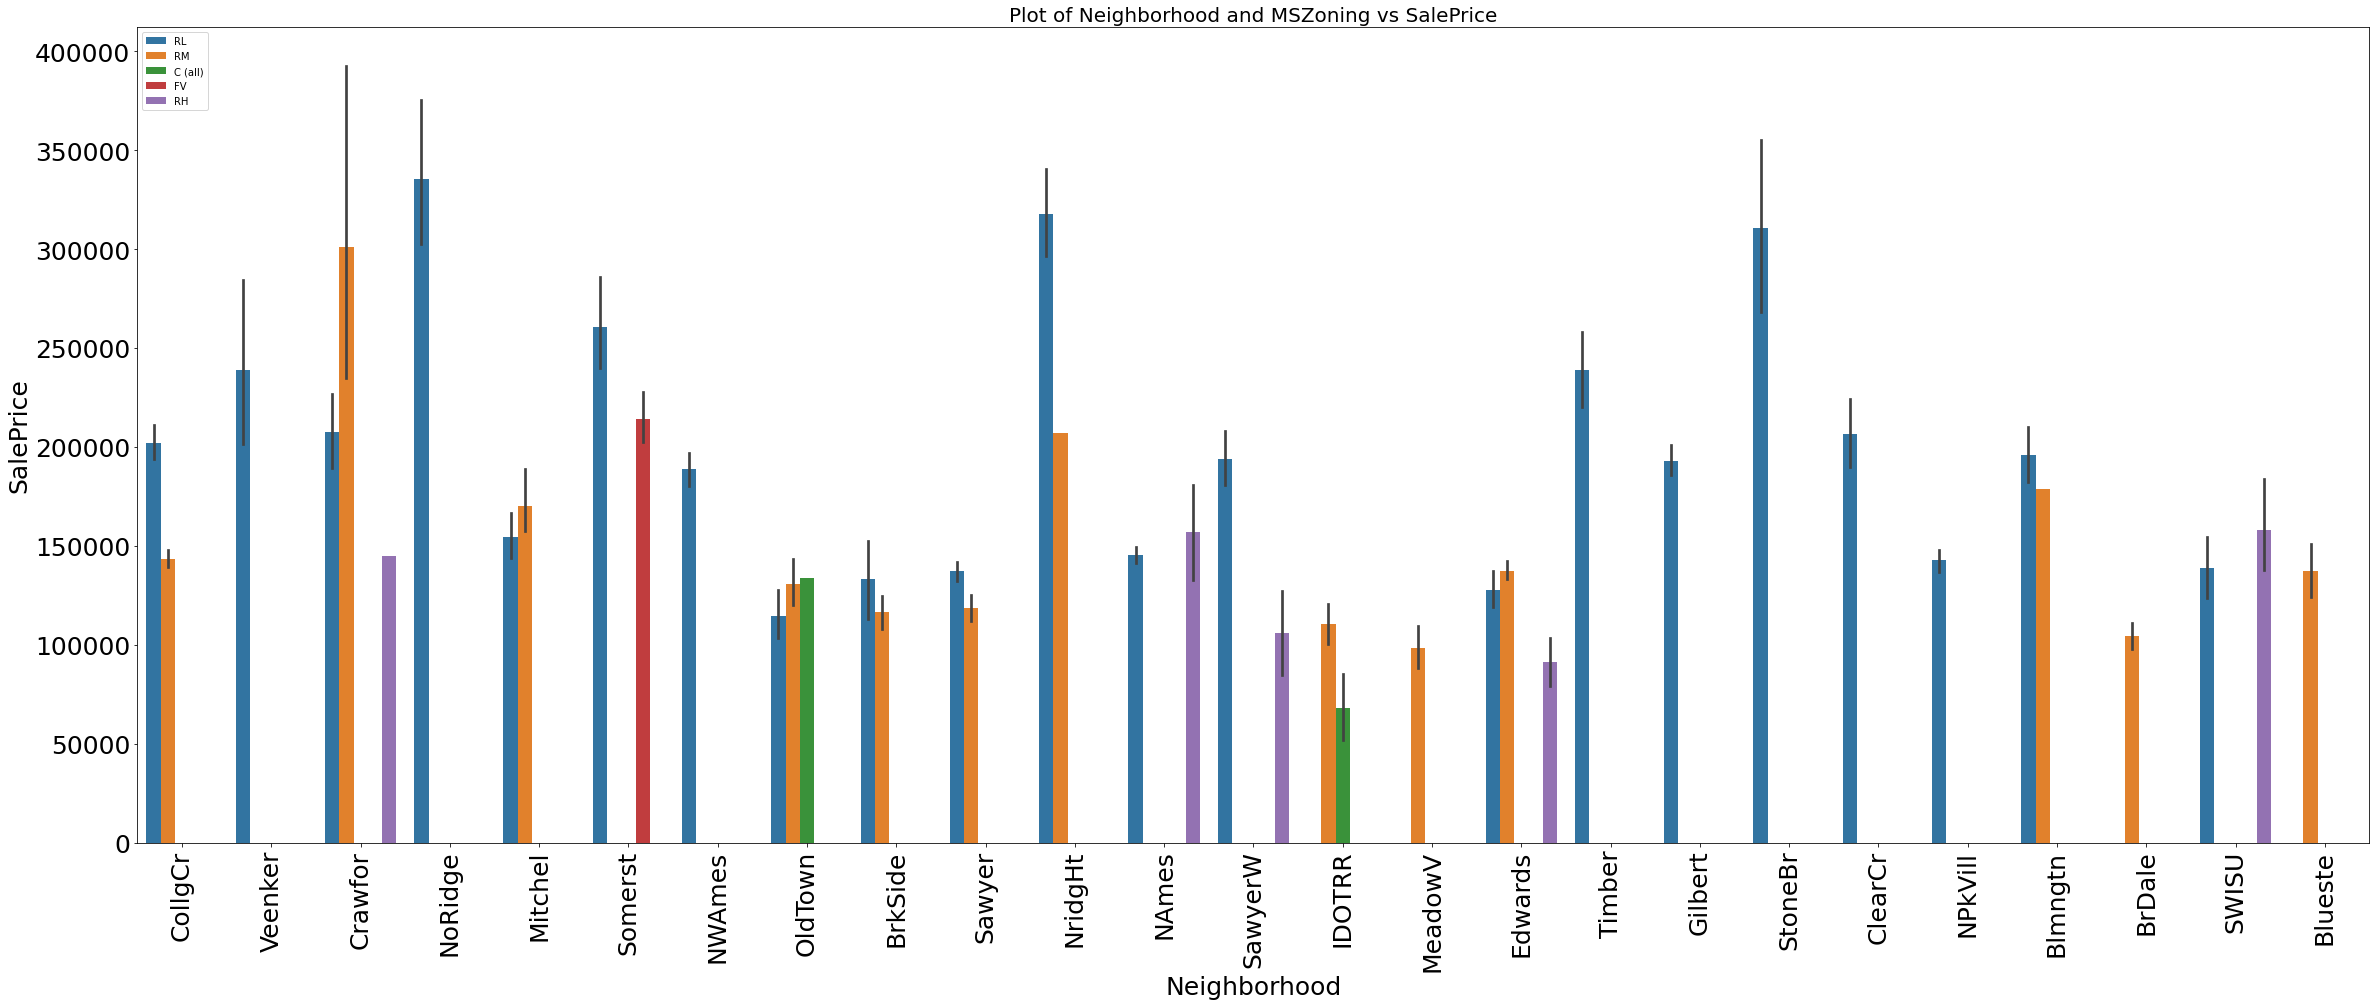

In [6]:
#Plot to understand the relationship between Neighborhood, SalePrice and MSZoning
multi_plot = eda_process(train_df)
multi_plot.multivarplot('Neighborhood', 'SalePrice', 'MSZoning')

### Observations from EDA

- Hypothesis #1: Properties with big LotArea will be more expensive
  - Confirmed. We see higher SalePrice as LotArea and GrLivArea increases.
- Hypothesis #2: Neighborhoods with low residential density will be more expensive.
  - Confirmed. The Neighborhoods with highest SalePrices are mostly low residential density. 
- Hypothesis #3: Properties with pool will be more expensive
  - Not Confirmed. Properties with Pool does not necessarily translate to high SalePrice. Pools with Excellent PoolQC have High SalePrice.
- Hypothesis #4: The older a property is the less expensive it will be
  - Confirmed, there is a gradual increase the price of recently built houses but difficult to confirm what is driving the increase, inflation or time value of money.
- Hypothesis #5: Properties with bigger Garage Area will be more expensive
  - Confirmed. Properties with Bigger GarageArea and Built-in GarageType are more expensive. Although there are more houses with Attached GarageType in the data.
- Hypothesis #6: Road access to house will affect Property SalePrice
  - Confirmed. There are more houses with paved road access and no alley access in the data and they typically cost more. 
- Hypothesis #7: Recently sold properties will be more expensive
  - Not Confirmed. No distinct correlation on the year property was sold in relation to the SalePrice.
- Hypothesis #8: Houses with more bedrooms will be more expensive
  - Confirmed. Houses with more bedroom and bathrooms tend to cost more.

2.4.3 Checking numerical features for correlation

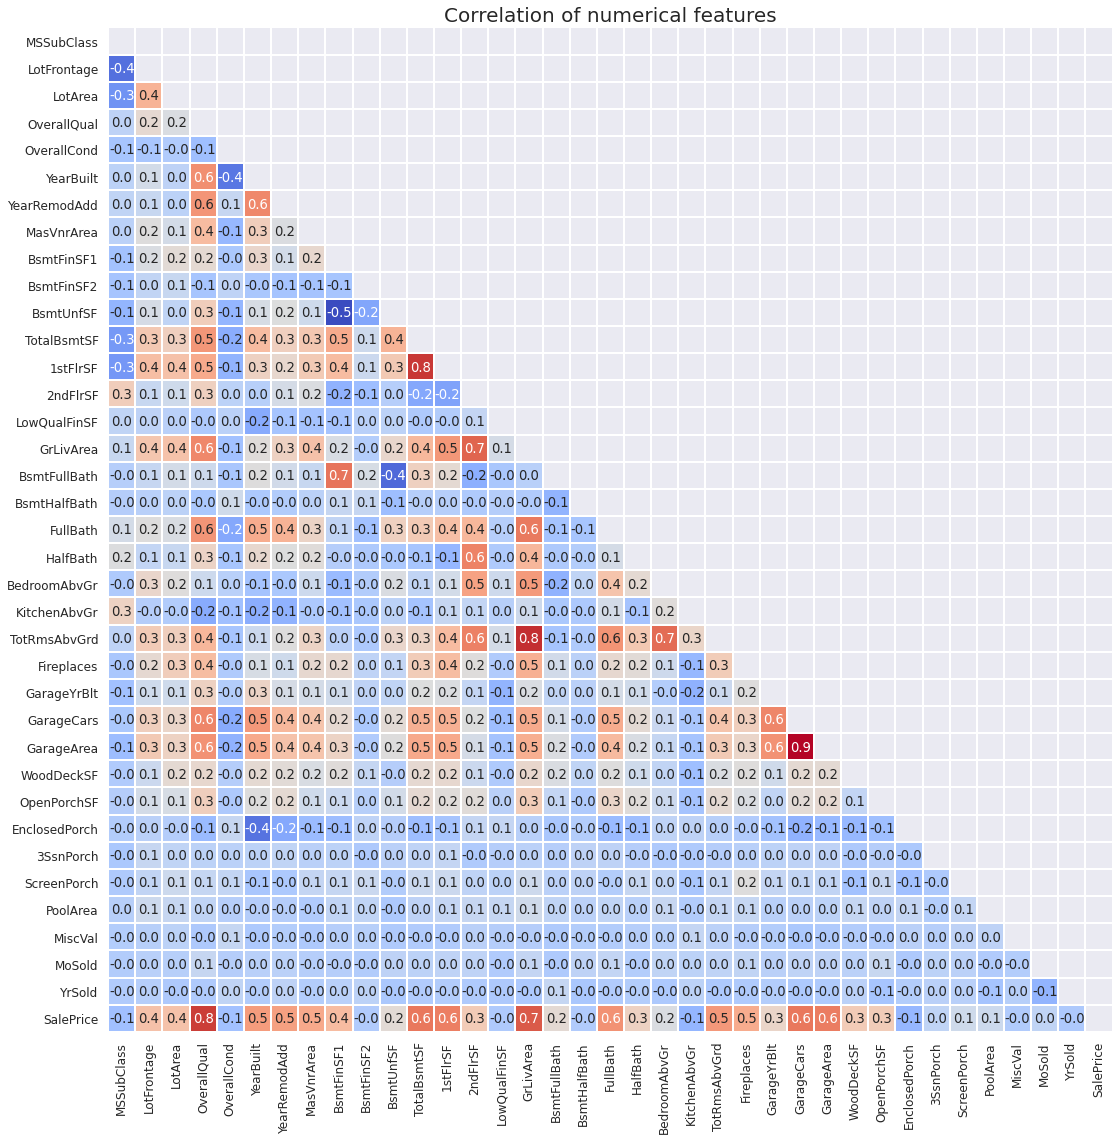

In [7]:
#Heatmap for numerical features correlation in Training Dataset
num_feature_corr = eda_process(train_df)
num_feature_corr.heatmap_num('numerical features')

Observations: 

1. The heat map shows OverallQual, GrLivArea, FullBath, GarageCars have the highest correlation to SalePrice in that order.
2. The following features will be excluded due to high correlation to other features that are highly correlated to SalePrice-
        - GarageArea- highly correlated to Garage Cars
        - 1stFlrSF- highly correlated to TotalBsmtSF
        - GarageYrBlt - highly correlated to YearBuilt
        - TotRmsAbvGrd - highly correlated to GrLivArea
3. Following features to be excluded due to low correlation to SalePrice equals to 0  - 
        BsmtFinSF2, LowQualFinSF, BsmtHalfBath, 3SsnPorch, MiscVal, MoSold, YrSold.

2.4.4 Drop numerical features identified in section 2.4.3 from both training and testing data

In [8]:
#Drop numerical features in both training and testing data
features = ['BsmtFinSF2', '1stFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold']
num_datadrop = eda_process(train_df)
num_datadrop.data_drop(train_df, test_df, features)

2.4.5 Checking categorical features for correlation

In [9]:
#Creating a copy of training data to use for categorical feature correlation analysis
analysis_data = train_df.copy()

In [10]:
#convert all categorical features into category dtype for correlation analysis
features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']
analysis_data[features]=analysis_data[features].astype('category')

The following functions are applied to all columns of the dataframe and encodes the subcategories with the mean of the salary of each category respectively.

In [11]:
def encode_label(df, col):
    cat_dict = {}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col] == cat]['SalePrice'].mean()
    df[col] = df[col].map(cat_dict)

In [12]:
#apply the encode_label function on categorical data
for col in analysis_data.columns:
  if analysis_data[col].dtype.name == 'category':
    encode_label(analysis_data, col)

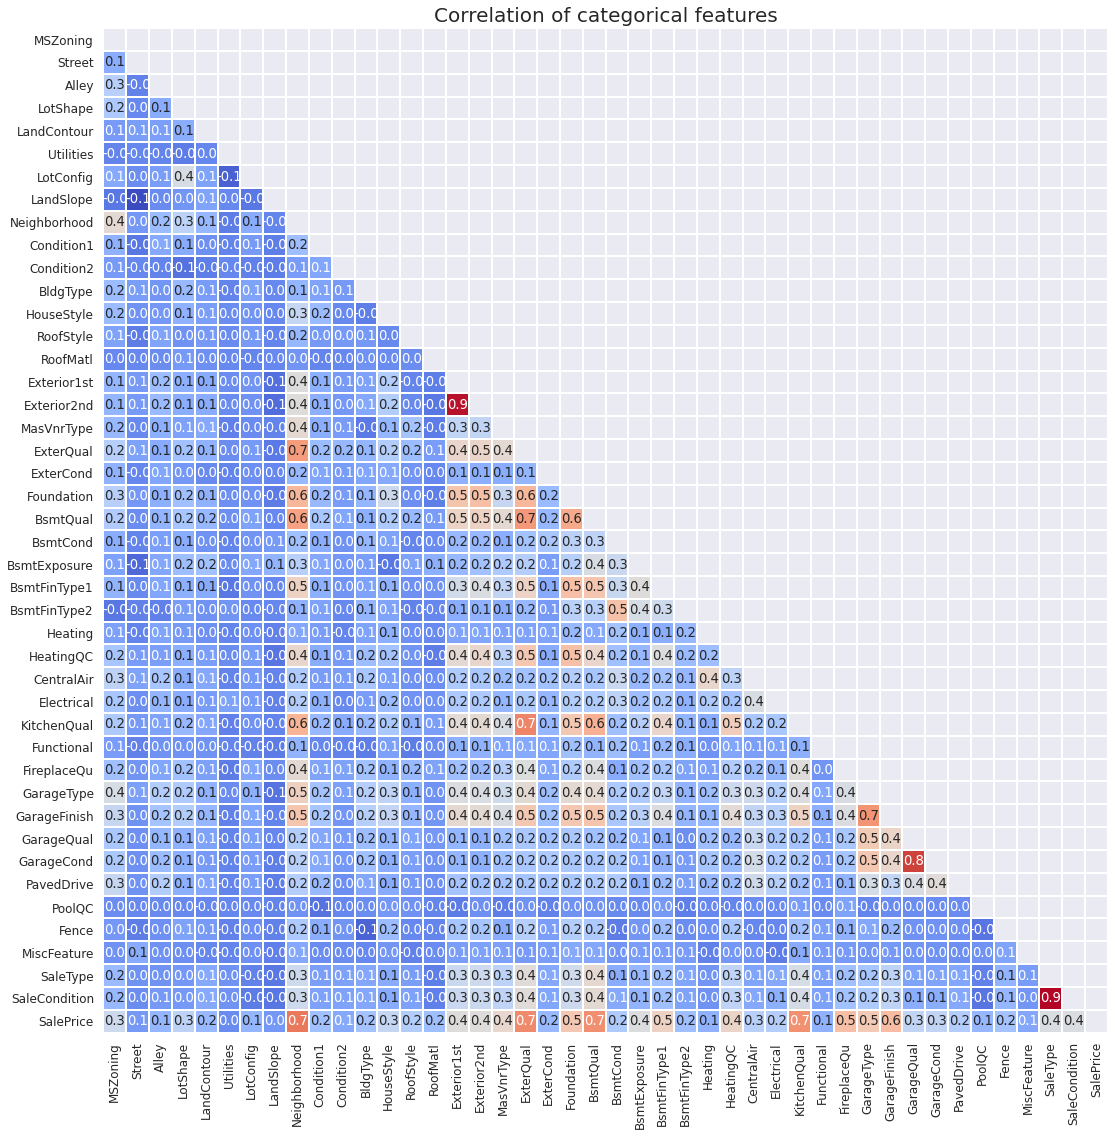

In [13]:
#Heatmap for categorical features correlation
cat_feature_corr = eda_process(analysis_data[features + ['SalePrice']])
cat_feature_corr.heatmap('categorical features')

Observations: 

1. The heat map shows Neighborhood, ExternalQual, BsmtQual, KitchenQual have the highest correlation to SalePrice
2. The following features will be excluded due to high correlation to other features that are highly correlated to SalePrice-
        - Sale Condition- highly correlated to SaleType
        - Exterior2nd- highly correlated to Exterior1st
3. Following features to be excluded due to no correlation to SalePrice - 
       Utilities, LandSlope.

2.4.6 Drop categorical features identified in section 2.4.4 from both training and testing data

In [14]:
#Drop categorical features in both training and testing data
features = ['Utilities','LandSlope', 'Exterior2nd', 'SaleCondition']
cat_datadrop = eda_process(train_df)
cat_datadrop.data_drop(train_df, test_df, features)

2.4.7 Inspecting numerical features columns for skewness in both training and testing datasets

2.4.7.1 Inspecting for skewness in both training dataset

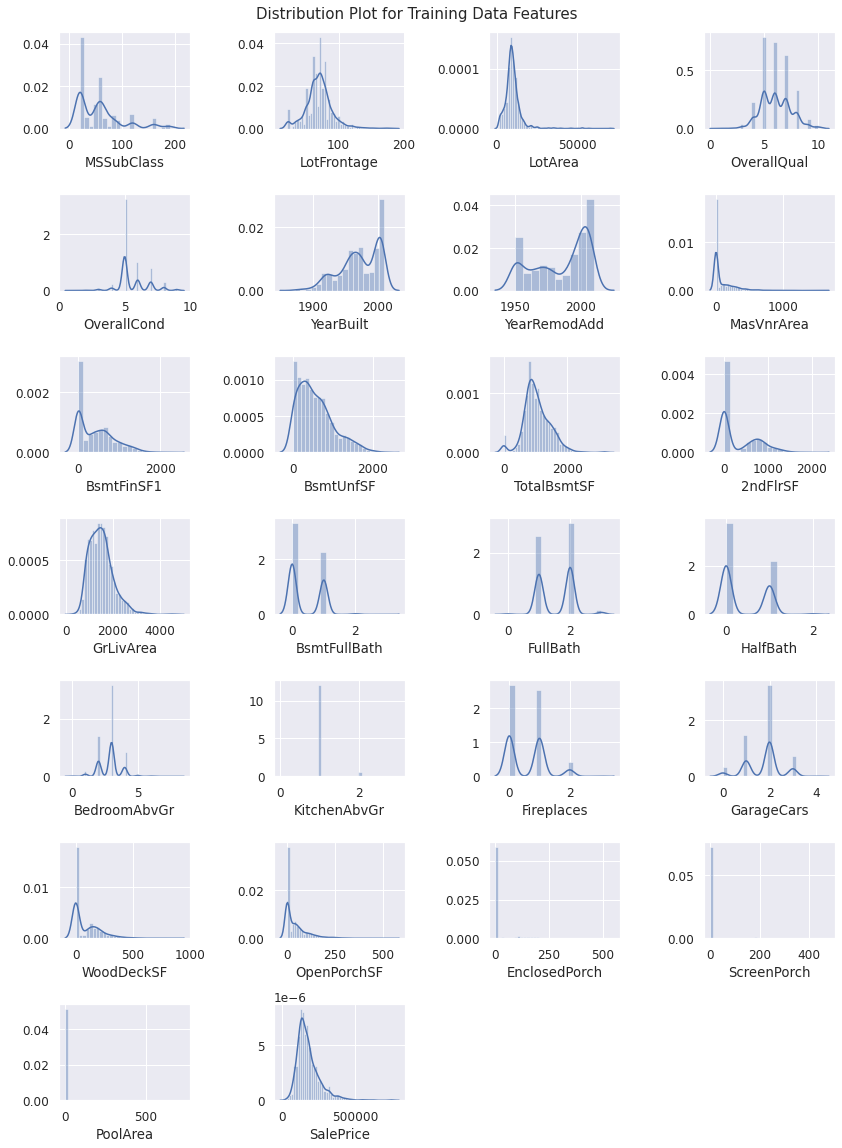

In [15]:
#Numeric features inspection for skewness in training dataset
num_distribution_plot = eda_process(train_df)
num_distribution_plot.num_features_distplot('Training Data')

Observations:
1. There are 3 features identified with uni-modal, skewed distributions could potentially be log transformed.
          - SalePrice, LotArea, & GrLivArea.

SalePrice has a skew of 1.9 while the log-transformed SalePrice improves the skew to 0.13


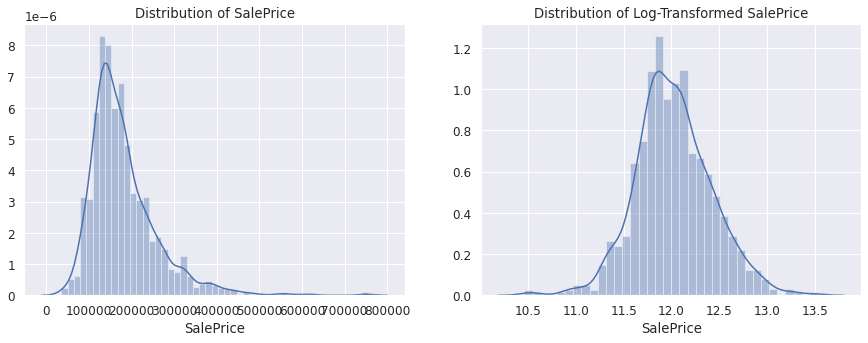

In [16]:
#SalePrice inspection for skewness
plot = eda_process(train_df.SalePrice)
plot.dist_plot('SalePrice')

Observation: Log Transformation of the identified variables minimizes the skewness in the data. Consider log transformation during feature engineering.

In [17]:
#Exporting the cleaned training and testing dataset to a csv file to use in EDA Notebook
train_df.to_csv('train_df_forModel.csv', index=False)
test_df.to_csv('test_df_forModel.csv', index=False)

In [ ]:
### Now that we have completed EDA, we will now proceed to building models in the "House Pricing Prediction Model Development Notebook"